In [1]:
import pandas as pd
import basedosdados as bd
import streamlit as st
import matplotlib as plt
import mplcyberpunk

In [2]:
df_data = bd.read_table(dataset_id='mundo_transfermarkt_competicoes',
    table_id='brasileirao_serie_a',
    billing_project_id="projfutebol")

df_brasFul = pd.read_csv('campeonato-brasileiro-full.csv'),
df_brasGols = pd.read_csv('campeonato-brasileiro-gols.csv'),
df_brasCards = pd.read_csv('campeonato-brasileiro-cartoes.csv')


Downloading: 100%|██████████| 8058/8058 [00:09<00:00, 886.47rows/s]


In [3]:
year = 2020
club = "Internacional"

# Selecionar campeonatos por ano
# Filtro especial para campeonatos de 2020 e 2021 que foram situações especiais devido a COVID
df_posRod = df_data[(df_data["time_man"] == club) & (df_data["ano_campeonato"] == year)]
df_posVis = df_data[(df_data["time_vis"] == club) & (df_data["ano_campeonato"] == year)]

df_new = pd.concat([
    df_posRod[['rodada', 'colocacao_man']].rename(columns={'colocacao_man': 'posicao'}),
    df_posVis[['rodada', 'colocacao_vis']].rename(columns={'colocacao_vis': 'posicao'})
])

df_new = df_new.sort_values('rodada').reset_index(drop=True)
df_newTest = df_new['posicao']

# Plotar gráfico de linha
plt.figure(figsize=(8, 3))  # Definir o tamanho da figura
plt.plot(df_new['rodada'], df_new['posicao'], marker='', color='red', lw=0.5)
plt.xlabel('Rodada')
plt.ylabel('Posicao')
plt.title(f'Evolução do {club} no Brasileiro {year}')
plt.axhline(y=1, color='black', linestyle='-', lw=0.8)
plt.axhline(y=20, color='black', linestyle='-', lw=0.5)
plt.axhline(y=17, color='red', linestyle='--', lw=0.5, label="Zona de Rebaixamento")
plt.legend(loc='lower right')

# Ajustar eixo Y do maior para o menor
plt.ylim(22, 0)

# Inserir rótulo de dados
for index, row in df_new.iterrows():
    plt.text(row['rodada'], row['posicao'], str(row['posicao']), ha='center', va='bottom', fontsize=6)
#Remover bordas do gráfico
plt.axis('off')
plt.grid(True)
plt.show()



TypeError: 'module' object is not callable

In [4]:
year = 2022
club = "Internacional"

df_pos = df_data[df_data["ano_campeonato"] == year]
df_pos = df_pos[(df_pos["time_man"] == club) | (df_pos["time_vis"] == club)]
df_pos = df_pos.sort_values(by='rodada')
columns = ["data", "rodada", "publico" ]
df_tabela = df_pos[columns]
df_tabela["Placar"] = df_tabela["time_man"] + " " + df_tabela["gols_man"].astype(str) + " x " + df_tabela["gols_vis"].astype(str) + " " + df_tabela["time_vis"]

# Display the resulting DataFrame
print(df_tabela)

KeyError: 'time_man'

In [5]:
year = 2022
club = "Internacional"

# Filter the DataFrame for the given year and club
df_pos = df_data[(df_data["ano_campeonato"] == year) & ((df_data["time_man"] == club) | (df_data["time_vis"] == club))]
df_pos = df_pos.sort_values(by='rodada')
columns = ["data", "rodada", "publico"]
df_tabela = df_pos[columns]
df_tabela["Placar"] = df_pos["time_man"] + " " + df_pos["gols_man"].astype(str) + " x " + df_pos["gols_vis"].astype(str) + " " + df_pos["time_vis"]

print(df_tabela)



            data  rodada  publico                             Placar
2184  2022-04-10       1    37531    Atlético-MG 2 x 0 Internacional
2325  2022-04-17       2    31783      Internacional 2 x 1 Fortaleza
2104  2022-04-24       3    16176     Fluminense 0 x 1 Internacional
2199  2022-05-02       4    23823        Internacional 0 x 0 Avaí FC
2065  2022-05-09       5     7341      Juventude 1 x 1 Internacional
2326  2022-05-15       6    18482    Internacional 2 x 2 Corinthians
2089  2022-05-22       7     7968      Cuiabá-MT 1 x 1 Internacional
2200  2022-05-31       8    11050    Internacional 1 x 1 Atlético-GO
2216  2022-06-06       9     3062  RB Bragantino 0 x 2 Internacional
1990  2022-06-09      10     8845         Santos 1 x 1 Internacional
2201  2022-06-12      11    22392       Internacional 3 x 1 Flamengo
2230  2022-06-16      12     8892          Goiás 1 x 2 Internacional
2327  2022-06-19      13    26219       Internacional 2 x 3 Botafogo
2202  2022-06-25      14    13454 

In [ ]:
import pandas as pd

def create_match_table(df_data, year, club):
    df_pos = df_data[(df_data["ano_campeonato"] == year) & ((df_data["time_man"] == club) | (df_data["time_vis"] == club))]
    df_pos = df_pos.sort_values(by='rodada')
    columns = ["data", "rodada", "publico"]
    df_tabela = df_pos[columns]
    df_tabela["Placar"] = df_pos["time_man"] + " " + df_pos["gols_man"].astype(str) + " x " + df_pos["gols_vis"].astype(str) + " " + df_pos["time_vis"]
    return df_tabela




In [24]:
import pandas as pd
year = 2022
club = "Athletico-PR"
def get_club_logo(club):
    logo_mapping = {
       'América-MG': "https://logodetimes.com/times/america-mineiro/logo-america-mineiro-256.png",
    'América-RN': "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/AmericaFC-RN.svg/180px-AmericaFC-RN.svg.png",
    'Athletico-PR':"https://logodetimes.com/times/atletico-paranaense/logo-atletico-paranaense-256.png",
    'Atlético-PR':"https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/CA_Paranaense.svg/250px-CA_Paranaense.svg.png",
    'Atlético-GO': "https://logodetimes.com/times/atletico-goianiense/logo-atletico-goianiense-com-estrela-256.png",
    'Atlético-MG':"https://logodetimes.com/times/atletico-mineiro/logo-atletico-mineiro-256.png",
    'Avaí FC':"https://logodetimes.com/times/avai/logo-avai-256.png",
    'Barueri':"https://upload.wikimedia.org/wikipedia/pt/thumb/a/af/Gr%C3%AAmio_Barueri.png/120px-Gr%C3%AAmio_Barueri.png",
    'Botafogo':"https://logodetimes.com/times/botafogo/logo-botafogo-256.png",
    'Brasiliense-DF':"https://upload.wikimedia.org/wikipedia/pt/thumb/3/3a/Brasiliense_Futebol_Clube.png/120px-Brasiliense_Futebol_Clube.png",
    'CSA': "https://logodetimes.com/times/csa/logo-csa-256.png",
    'Ceará SC':"https://logodetimes.com/times/ceara/logo-ceara-256.png",
    'Chapecoense': "https://logodetimes.com/times/chapecoense/logo-chapecoense-256.png",
    'Corinthians': "https://logodetimes.com/times/corinthians/logo-corinthians-256.png",
    'Coritiba FC':"https://logodetimes.com/times/coritiba/logo-coritiba-256.png",
    'Criciúma EC':"https://logodetimes.com/times/criciuma/logo-criciuma-5.png",
    'Cruzeiro':"https://logodetimes.com/times/cruzeiro/logo-cruzeiro-256.png",
    'Cuiabá-MT':"https://logodetimes.com/times/cuiaba/logo-cuiaba-256.png",
    "EC Bahia":"https://logodetimes.com/times/bahia/logo-bahia-256.png",
    'EC Vitória':"https://logodetimes.com/times/vitoria/logo-vitoria-256.png",
    'Figueirense FC': "https://logodetimes.com/times/figueirense/logo-figueirense-256.png",
    'Flamengo': "https://logodetimes.com/times/flamengo/logo-flamengo-256.png",
    'Fluminense':"https://logodetimes.com/times/fluminense/logo-fluminense-256.png",
    'Fortaleza': "https://logodetimes.com/times/fortaleza/logo-fortaleza-256.png",
    'Goiás' or 'Goiás EC':"https://logodetimes.com/times/goias/logo-goias-esporte-clube-4096.png",
    'Grêmio': "https://logodetimes.com/times/gremio/logo-gremio-256.png",
    'Guarani': "https://logodetimes.com/times/guarani/logo-guarani-256.png",
    'Internacional':"https://logodetimes.com/times/internacional/logo-internacional-256.png",
    'Ipatinga FC': "https://upload.wikimedia.org/wikipedia/pt/thumb/9/95/IpatingaFC.png/120px-IpatingaFC.png",
    'Joinville-SC':"https://upload.wikimedia.org/wikipedia/en/thumb/1/14/Joinville_Esporte_Clube_logo.svg/150px-Joinville_Esporte_Clube_logo.svg.png",
    'Juventude':"https://logodetimes.com/times/juventude/logo-juventude-256.png",
    'Náutico':"https://logodetimes.com/times/nautico/logo-nautico-256.png",
    'Palmeiras':"https://logodetimes.com/times/palmeiras/logo-palmeiras-256.png",
    'Paraná':"https://logodetimes.com/times/parana/logo-parana-256.png",
    'Paysandu SC':"https://logodetimes.com/times/paysandu/logo-paysandu-5.png",
    'Ponte Preta':"https://logodetimes.com/times/ponte-preta/logo-ponte-preta-256.png",
    'Portuguesa':"https://logodetimes.com/times/portugal/selecao-portuguesa-de-futebol-4096.png",
    'RB Bragantino': "https://logodetimes.com/times/red-bull-bragantino/logo-red-bull-bragantino-256.png",
    'Santa Cruz': "https://logodetimes.com/times/santa-cruz/logo-santa-cruz-256.png",
    'Santo André': "https://logodetimes.com/times/santo-andre/logo-santo-andre-256.png",
    'Santos' or 'Santos FC': "https://logodetimes.com/times/santos/logo-santos-256.png  ",
    'Sport Recife':"https://upload.wikimedia.org/wikipedia/en/thumb/4/45/Sport_Club_Recife.svg/170px-Sport_Club_Recife.svg.png",
    'São Caetano':"https://logodetimes.com/times/sao-caetano/logo-sao-caetano-256.png",
    'São Paulo': "https://logodetimes.com/times/sao-paulo/logo-sao-paulo-256.png",
    'Vasco da Gama':"https://logodetimes.com/times/vasco-da-gama/logo-vasco-da-gama-256.png",
    }
    return logo_mapping.get(club, "")

def create_match_table(df_data, year, club):
    df_pos = df_data[(df_data["ano_campeonato"] == year) & ((df_data["time_man"] == club) | (df_data["time_vis"] == club))]
    df_pos = df_pos.sort_values(by='rodada')
    columns = ["data", "rodada", "publico","time_man","time_vis"]
    df_tabela = df_pos[columns]
    df_tabela["Placar"] = df_pos["time_man"] + " " + df_pos["gols_man"].astype(str) + " x " + df_pos["gols_vis"].astype(str) + " " + df_pos["time_vis"]

    # Add a new column for the logo URL using the get_club_logo function
    df_tabela["Logo_man"] = df_tabela.apply(lambda row: get_club_logo(row["time_man"]), axis=1)
    df_tabela["Logo_vis"] = df_tabela.apply(lambda row: get_club_logo(row["time_vis"]), axis=1)
    # df_tabela["Logo_man"] = df_tabela.apply(lambda row: get_club_logo(row["time_man"]), axis=1)

    return df_tabela
    

resulting_table = create_match_table(df_data, year, club)


print(resulting_table)


            data  rodada  publico       time_man       time_vis  \
2115  2022-04-11       1    20606      São Paulo   Athletico-PR   
2161  2022-04-17       2    17305   Athletico-PR    Atlético-MG   
2162  2022-04-23       3    22659   Athletico-PR       Flamengo   
2125  2022-04-30       4     2433     América-MG   Athletico-PR   
2163  2022-05-08       5    22659   Athletico-PR       Ceará SC   
2105  2022-05-15       6     4722     Fluminense   Athletico-PR   
2164  2022-05-23       7    15949   Athletico-PR        Avaí FC   
2090  2022-05-29       8     4539      Cuiabá-MT   Athletico-PR   
2309  2022-06-05       9    19323   Athletico-PR         Santos   
2266  2022-06-09      10     3590      Juventude   Athletico-PR   
2054  2022-06-13      11    18167      Fortaleza   Athletico-PR   
2310  2022-06-16      12    25965   Athletico-PR    Corinthians   
2151  2022-06-19      13    22609    Coritiba FC   Athletico-PR   
2165  2022-06-25      14    16327   Athletico-PR  RB Bragantin

In [27]:
import pandas as pd

def get_club_logo(club):
    logo_mapping = {
        'América-MG': "https://logodetimes.com/times/america-mineiro/logo-america-mineiro-256.png",
        'América-RN': "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/AmericaFC-RN.svg/180px-AmericaFC-RN.svg.png",
        'Athletico-PR': "https://logodetimes.com/times/atletico-paranaense/logo-atletico-paranaense-256.png",
        'Atlético-PR': "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/CA_Paranaense.svg/250px-CA_Paranaense.svg.png",
    }
    return logo_mapping.get(club, "")

def create_match_table(df_data, year, club):
    df_pos = df_data[(df_data["ano_campeonato"] == year) & ((df_data["time_man"] == club) | (df_data["time_vis"] == club))]
    df_pos = df_pos.sort_values(by='rodada')
    columns = ["data", "rodada", "publico", "time_man", "time_vis"]
    df_tabela = df_pos[columns]
    df_tabela["Placar"] = df_pos["time_man"] + " " + df_pos["gols_man"].astype(str) + " x " + df_pos["gols_vis"].astype(str) + " " + df_pos["time_vis"]

    # Add new columns for the logo URLs using the get_club_logo function
    df_tabela["Logo_man"] = df_tabela["time_man"].apply(get_club_logo)
    df_tabela["Logo_vis"] = df_tabela["time_vis"].apply(get_club_logo)

    # Select and rename columns for the final table
    df_tab = df_tabela[["data", "rodada", "Logo_man", "Placar", "Logo_vis", "publico"]]
    df_tab.rename(columns={"data": "Data do Jogo", "rodada": "Rod.", "Logo_man": "", "Logo_vis": "", "publico": "Torcedores"}, inplace=True)

    return df_tab

# Example usage
year = 2022
club = "Internacional"
resulting_table = create_match_table(df_data, year, club)
print(resulting_table)


     Data do Jogo  Rod.                                                     \
2184   2022-04-10     1                                                      
2325   2022-04-17     2                                                      
2104   2022-04-24     3                                                      
2199   2022-05-02     4                                                      
2065   2022-05-09     5                                                      
2326   2022-05-15     6                                                      
2089   2022-05-22     7                                                      
2200   2022-05-31     8                                                      
2216   2022-06-06     9                                                      
1990   2022-06-09    10                                                      
2201   2022-06-12    11                                                      
2230   2022-06-16    12                                         

In [28]:
import pandas as pd

def get_club_logo(club):
    logo_mapping = {
        'América-MG': "https://logodetimes.com/times/america-mineiro/logo-america-mineiro-256.png",
        'América-RN': "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/AmericaFC-RN.svg/180px-AmericaFC-RN.svg.png",
        'Athletico-PR': "https://logodetimes.com/times/atletico-paranaense/logo-atletico-paranaense-256.png",
        'Atlético-PR': "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/CA_Paranaense.svg/250px-CA_Paranaense.svg.png",
    }
    return logo_mapping.get(club, "")

def create_match_table(df_data, year, club):
    df_pos = df_data[(df_data["ano_campeonato"] == year) & ((df_data["time_man"] == club) | (df_data["time_vis"] == club))]
    df_pos = df_pos.sort_values(by='rodada')
    columns = ["data", "rodada", "publico", "time_man", "time_vis"]
    df_tabela = df_pos[columns]
    df_tabela["Placar"] = df_pos["time_man"] + " " + df_pos["gols_man"].astype(str) + " x " + df_pos["gols_vis"].astype(str) + " " + df_pos["time_vis"]

    # Add new columns for the logo URLs using the get_club_logo function
    df_tabela["Logo_man"] = df_tabela["time_man"].apply(get_club_logo)
    df_tabela["Logo_vis"] = df_tabela["time_vis"].apply(get_club_logo)

    # Select and rename columns for the final table
    df_tab = df_tabela[["data", "rodada", "Logo_man", "Placar", "Logo_vis", "publico"]]
    df_tab.rename(columns={"data": "Data do Jogo", "rodada": "Rodada", "Logo_man": None, "Logo_vis": None, "publico": "Público"}, inplace=True)

    return df_tab

# Example usage
year = 2022
club = "Internacional"
resulting_table = create_match_table(df_data, year, club)
print(resulting_table)


     Data do Jogo  Rodada                                               None  \
2184   2022-04-10       1                                                      
2325   2022-04-17       2                                                      
2104   2022-04-24       3                                                      
2199   2022-05-02       4                                                      
2065   2022-05-09       5                                                      
2326   2022-05-15       6                                                      
2089   2022-05-22       7                                                      
2200   2022-05-31       8                                                      
2216   2022-06-06       9                                                      
1990   2022-06-09      10                                                      
2201   2022-06-12      11                                                      
2230   2022-06-16      12               

In [114]:
df_brasGols = pd.read_csv('./campeonato-brasileiro-gols.csv')
year = 2022
club = "América-MG"
#################  Selecionar campeonatos por ano #################
### filtro especial para campeonatos de 2020 e 2021 que foram situações especiais devido a COVID  ###
if year == 2020:
    df_brasFul["data"] = pd.to_datetime(df_brasFul["data"], format="%d/%m/%Y") 
    df_year = df_brasFul[df_brasFul["data"].dt.year == year].copy()  
    df_jogosCamp = df_brasFul[df_brasFul["ID"].astype(int) >= min_id].head(380)
    min_id = df_year["ID"].astype(int).min()
    max_id = df_jogosCamp["ID"].astype(int).max()
    
elif year == 2021:
    df_brasFul["data"] = pd.to_datetime(df_brasFul["data"], format="%d/%m/%Y")  
    df_year = df_brasFul[df_brasFul["data"].dt.year == year]  
    df_jogosCamp = df_year[df_year["data"] > pd.to_datetime("28/5/2021")]  
    min_id = df_jogosCamp["ID"].astype(int).min()
    max_id = df_jogosCamp["ID"].astype(int).max()
   
else:
# Filtra linhas com o ano do campeonato
    df_brasFul["data"] = pd.to_datetime(df_brasFul["data"], format="%d/%m/%Y")  
    df_jogosCamp = df_brasFul[df_brasFul["data"].dt.year == year]
    min_id = df_jogosCamp["ID"].astype(int).min()
    max_id = df_jogosCamp["ID"].astype(int).max()


# Filtrar as linhas entre 
filtered_df = df_brasGols[(df_brasGols['partida_id'] >= min_id) & (df_brasGols['partida_id'] <= max_id)]

# Criar um dicionário para armazenar os atletas por clube
clubes_atletas = {}

# Iterar pelas linhas do DataFrame filtrado
for index, row in filtered_df.iterrows():
    clube = row['clube']
    atleta = row['atleta']
    
    if clube not in clubes_atletas:
        clubes_atletas[clube] = set()
    
    if pd.notnull(atleta):
        clubes_atletas[clube].add(atleta)

# Impressão dos atletas por clube
for clube, atletas in clubes_atletas.items():
    print(f"Clube: {clube}")
    print("Atletas:", ', '.join(atletas))
    print("=" * 40)



Clube: Ceara
Atletas: Lucas Ribeiro, Erick, Stiven Mendoza, Vitor Mendes, Jô, Luiz Otávio, Zé Roberto, Jorge Marco de Oliveira Moraes, Lima, Guilherme Castilho, Fernando Sobral, Bruno Pacheco, Vinícius, Cléber, Nino Paraíba
Clube: Palmeiras
Atletas: Eduardo Pereira Rodrigues, Cleiton Schwengber, Wesley Ribeiro Silva, José Manuel Alberto López, Raphael Cavalcante Veiga, Roni, Breno Lopes, Endrick, Miguel Merentiel, Rony, Gustavo Gómez, Gabriel Veron, Murilo Cerqueira, Vanderlan, Gustavo Scarpa, Gabriel Menino, Eduard Atuesta, Mayke, José Rafael Vivian, Danilo
Clube: Atletico-GO
Atletas: Léo Pereira, Luiz Fernando Moraes dos Santos, Jefferson, Marlon Freitas, Diego Churín, Luan Garcia Teixeira, Shaylon, Kelvin, Airton, Lucas Gazal, Dudu, Jorginho, Wellington Rato, Gabriel Baralhas
Clube: Flamengo
Atletas: Gustavo Henrique Vernes, Fabrício Bruno, Diego Ribas, Ayrton Lucas Dantas de Medeiros, Werton, Mário Sérgio Santos Costa, Éverton Ribeiro, Willian Arão, Mauricio Isla, Andreas Pereira, 

In [121]:
df_brasGols = pd.read_csv('./campeonato-brasileiro-gols.csv')
year = 2022
club = "America-MG"
#################  Selecionar campeonatos por ano #################
### filtro especial para campeonatos de 2020 e 2021 que foram situações especiais devido a COVID  ###
if year == 2020:
    df_brasFul["data"] = pd.to_datetime(df_brasFul["data"], format="%d/%m/%Y") 
    df_year = df_brasFul[df_brasFul["data"].dt.year == year].copy()  
    df_jogosCamp = df_brasFul[df_brasFul["ID"].astype(int) >= min_id].head(380)
    min_id = df_year["ID"].astype(int).min()
    max_id = df_jogosCamp["ID"].astype(int).max()
    
elif year == 2021:
    df_brasFul["data"] = pd.to_datetime(df_brasFul["data"], format="%d/%m/%Y")  
    df_year = df_brasFul[df_brasFul["data"].dt.year == year]  
    df_jogosCamp = df_year[df_year["data"] > pd.to_datetime("28/5/2021")]  
    min_id = df_jogosCamp["ID"].astype(int).min()
    max_id = df_jogosCamp["ID"].astype(int).max()
   
else:
# Filtra linhas com o ano do campeonato
    df_brasFul["data"] = pd.to_datetime(df_brasFul["data"], format="%d/%m/%Y")  
    df_jogosCamp = df_brasFul[df_brasFul["data"].dt.year == year]
    min_id = df_jogosCamp["ID"].astype(int).min()
    max_id = df_jogosCamp["ID"].astype(int).max()

   #################  Contagem de gols por ano ################# 
# print(min_id)
# print(max_id)
filtered_df = df_brasGols[(df_brasGols['partida_id'] >= (min_id)) & (df_brasGols['partida_id'] <= (max_id))]
filtered_df = filtered_df[(df_brasGols['clube'])==club]

# Criar um dicionário para armazenar a contagem de jogadores
jogadores_contagem = {}

# Iterar pelas linhas do DataFrame filtrado
for index, row in filtered_df.iterrows():
    atleta = row['atleta']
    
    if pd.notnull(atleta):
        if atleta in jogadores_contagem:
            jogadores_contagem[atleta] += 1
        else:
            jogadores_contagem[atleta] = 1

jogadores_contagem_ordenada = dict(sorted(jogadores_contagem.items(), key=lambda item: item[1], reverse=True))

# Criar um DataFrame a partir do dicionário ordenado
df_contagem_ordenada = pd.DataFrame(jogadores_contagem_ordenada.items(), columns=['Atleta', 'Contagem'])

# Imprimir a tabela
print(df_contagem_ordenada)



IndentationError: unexpected indent (1492032071.py, line 53)

In [6]:
clubs = df_data["time_man"].unique()
clubs.sort()
print (clubs)

['América-MG' 'América-RN' 'Athletico-PR' 'Atlético-GO' 'Atlético-MG'
 'Atlético-PR' 'Avaí FC' 'Barueri' 'Botafogo' 'Brasiliense-DF' 'CSA'
 'Ceará SC' 'Chapecoense' 'Corinthians' 'Coritiba FC' 'Criciúma EC'
 'Cruzeiro' 'Cuiabá-MT' 'EC Bahia' 'EC Vitória' 'Figueirense FC'
 'Flamengo' 'Fluminense' 'Fortaleza' 'Goiás' 'Goiás EC' 'Grêmio' 'Guarani'
 'Internacional' 'Ipatinga FC' 'Joinville-SC' 'Juventude' 'Náutico'
 'Palmeiras' 'Paraná' 'Paysandu SC' 'Ponte Preta' 'Portuguesa'
 'RB Bragantino' 'Santa Cruz' 'Santo André' 'Santos' 'Santos FC'
 'Sport Recife' 'São Caetano' 'São Paulo' 'Vasco da Gama']


In [12]:
year = 2021
club = "Grêmio"

df_pos = df_data[df_data["ano_campeonato"] == year]
df_pos = df_pos[(df_pos["time_man"] == club) | (df_pos["time_vis"] == club)]
df_pos = df_pos.sort_values(by='rodada')
df_pos

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_man,time_vis,tecnico_man,...,chutes_bola_parada_man,chutes_bola_parada_vis,defesas_man,defesas_vis,impedimentos_man,impedimentos_vis,chutes_man,chutes_vis,chutes_fora_man,chutes_fora_vis
1952,2021,2021-05-30,1,Estádio Governador Plácido Castelo,Savio Pereira Sampaio,0,60326,Ceará SC,Grêmio,Guto Ferreira,...,17,17,1,3,2,0,12,12,5,5
1895,2021,2021-11-24,2,Arena do Grêmio,Braulio da Silva Machado,0,60540,Grêmio,Flamengo,Vagner Mancini,...,13,14,4,5,2,1,18,12,8,5
1896,2021,2021-06-13,3,Arena do Grêmio,Ricardo Marques Ribeiro,0,60540,Grêmio,Athletico-PR,Tiago Nunes,...,12,21,3,1,0,0,10,9,5,3
2200,2021,2021-06-18,4,Estádio Adelmar da Costa Carvalho,Denis Ribeiro Serafim,0,35000,Sport Recife,Grêmio,Umberto Louzer,...,9,15,7,3,1,2,10,14,6,5
2030,2021,2021-08-19,5,Arena Pantanal,Leo Simão Holanda,0,42968,Cuiabá-MT,Grêmio,None,...,10,9,2,2,0,2,10,7,4,4
1897,2021,2021-06-25,6,Arena do Grêmio,Caio Max Augusto Vieira,0,60540,Grêmio,Santos,Tiago Nunes,...,14,20,1,4,2,2,19,6,5,3
1898,2021,2021-06-28,7,Arena do Grêmio,Marcelo de Lima Henrique,0,60540,Grêmio,Fortaleza,Tiago Nunes,...,11,12,5,5,1,3,18,16,9,7
1994,2021,2021-07-01,8,Estádio Alfredo Jaconi,Vinicius Gonçalves Dias Araujo,0,23726,Juventude,Grêmio,Marquinhos Santos,...,11,15,3,3,0,1,11,13,6,6
1899,2021,2021-07-05,9,Arena do Grêmio,Marielson Alves Silva,0,60540,Grêmio,Atlético-GO,Tiago Nunes,...,8,15,4,4,2,4,21,10,11,1
2013,2021,2021-07-08,10,Allianz Parque,Felipe Fernandes,0,43600,Palmeiras,Grêmio,Abel Ferreira,...,15,15,4,4,2,0,18,12,8,5


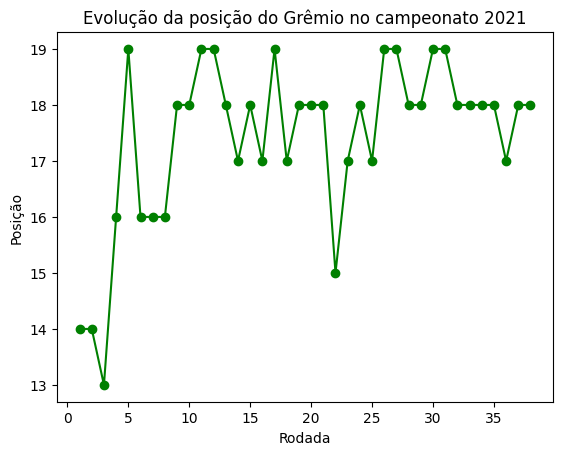

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
year = 2021
club = "Grêmio"

df_posRod = df_data[((df_data["time_man"] == club) & (df_data["ano_campeonato"] == year))]
df_posVis = df_data[((df_data["time_vis"] == club) & (df_data["ano_campeonato"] == year))]

df_new = pd.concat([df_posRod[['rodada', 'colocacao_man']].rename(columns={'colocacao_man': 'posicao'}),
                    df_posVis[['rodada', 'colocacao_vis']].rename(columns={'colocacao_vis': 'posicao'})])

df_new = df_new.sort_values('rodada').reset_index(drop=True)

# Plotar gráfico de linha
plt.plot(df_new['rodada'], df_new['posicao'], marker='o', color='green')
plt.xlabel('Rodada')
plt.ylabel('Posição')
plt.title(f'Evolução da posição do {club} no campeonato {year}')
# plt.grid(false)
plt.show()